# Data Visualisation

In this notebook we will build data visualisations based on the datasets we have constructed in our feature engineering notebooks.

+ visualisations based on the static predetermined targets and drawdowns
+ visualisations based on the dynamic dataframes. 

In [56]:
#Import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [57]:
plt.style.use("fivethirtyeight")

In [2]:
!ls

Data_Viz.ipynb             ftse_base4.csv
FTSE4 Data Prep.ipynb      ftse_flexi_functions.ipynb
FTSE4.csv                  ftse_functions.ipynb
FTSE_ma_forecaster.ipynb   ftse_functions.py
Primary_Interface.ipynb    ftse_static.csv
README.md                  ftse_user_interface.ipynb
__pycache__                static_target_profit.csv
ftse_4_features.ipynb      user_interface_function.py


In [8]:
#Read in a our static dataset built in the ftse_4_features notebook
df = pd.read_csv("static_target_profit.csv", parse_dates=["time"])

Catch Up:

In the statis dataset we have built the following nine features:
1. Three outcome features based on a target of 10, 20 & 40 with the stop loss placed at the extreme of the signal candle
2. Three profit features, based on the outcome targets, that give the max +/- profit 
3. Three drawdown features, based on the outcome targets, that state the maximum drawdown value for a win outcome. 

We have listed elsewhere (add link) the practical , technical and accuracy issues associated with this dataframe. However it served well as an effective base document to progress from.

In [9]:
df.head()

,time,open,high,low,close,direction,signal,ten_outcome,twenty_outcome,forty_outcome,ten_profit,twenty_profit,forty_profit,draw_ten,draw_twenty,draw_forty
0,2020-04-23 11:00:00,5770.0,5822.0,5755.6,5798.1,long,unknown,no_trade,no_trade,no_trade,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-04-23 15:00:00,5797.9,5847.9,5762.1,5773.2,short,trade,win,win,win,41.6,41.6,41.6,23.6,23.6,23.6
2,2020-04-23 19:00:00,5773.2,5796.8,5744.1,5769.5,short,no_trade,no_trade,no_trade,no_trade,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-04-23 23:00:00,5756.8,5770.2,5731.6,5740.2,short,no_trade,no_trade,no_trade,no_trade,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-04-24 03:00:00,5740.0,5755.0,5720.3,5744.3,long,trade,win,win,win,45.9,45.9,45.9,15.5,15.5,15.5


In [12]:
#draft

drawdown_size = list(range(0,105,5))
drawdown_size

[0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100]

In [13]:
#Create a list of aggregate totals above a certain threshold size (this smooths the graph for our small data set. )
drawdown_count_ten = []
for i in drawdown_size:
    drawdown_count_ten.append(df[(df.draw_ten>i)].shape[0])


drawdown_count_twenty = []
for i in drawdown_size:
    drawdown_count_twenty.append(df[(df.draw_twenty>i)].shape[0])


drawdown_count_forty = []
for i in drawdown_size:
    drawdown_count_forty.append(df[(df.draw_forty>i)].shape[0])
    
drawdown_count_ten, drawdown_count_twenty, drawdown_count_forty

([178, 135, 103, 65, 42, 22, 11, 8, 6, 5, 4, 4, 2, 1, 1, 1, 1, 1, 1, 1, 0],
 [135, 96, 70, 42, 25, 9, 4, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [96, 65, 47, 26, 17, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

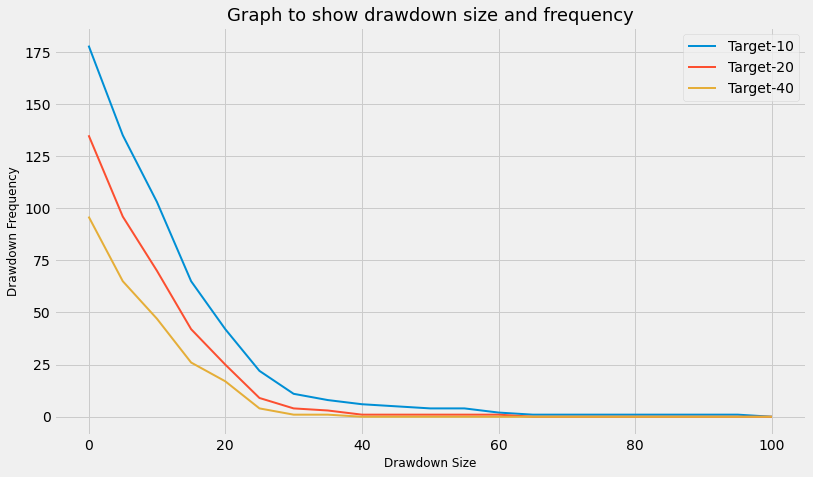

In [14]:
#Plot drawdown size against number of wins for drawdowns greater than a certain value
plt.figure(figsize=(12,7))
plt.plot(drawdown_size, drawdown_count_ten, linewidth=2);
plt.plot(drawdown_size, drawdown_count_twenty,  linewidth=2);
plt.plot(drawdown_size, drawdown_count_forty,  linewidth=2);
plt.title("Graph to show drawdown size and frequency", fontsize=18)
plt.xlabel("Drawdown Size", fontsize=12)
plt.ylabel("Drawdown Frequency", fontsize=12)
plt.legend(["Target-10", "Target-20", "Target-40"])
plt.show()

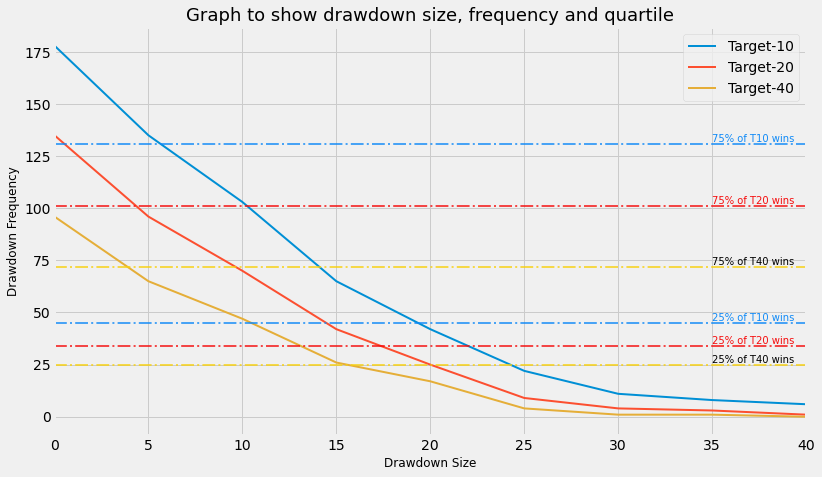

In [15]:
#Plot drawdown size against frequency for each target value, zoomed and annotated
plt.figure(figsize=(12,7))
plt.plot(drawdown_size, drawdown_count_ten, linewidth=2);
plt.plot(drawdown_size, drawdown_count_twenty,  linewidth=2);
plt.plot(drawdown_size, drawdown_count_forty,  linewidth=2);

note_x = 35

plt.axhline(y=45, color='#108AF7', linestyle='-.', linewidth=2, alpha=0.75)
plt.axhline(y=34, color='#F50D0D', linestyle='-.', linewidth=2, alpha=0.75)
plt.axhline(y=25, color='#F7D010', linestyle='-.', linewidth=2, alpha=0.75)
plt.annotate("25% of T10 wins", (note_x,46), color='#108AF7', size=10)
plt.annotate("25% of T20 wins", (note_x,35), color='#F50D0D', size=10)
plt.annotate("25% of T40 wins", (note_x,26), color='k', size=10)

plt.axhline(y=131, color='#108AF7', linestyle='-.', linewidth=2, alpha=0.75)
plt.axhline(y=101, color='#F50D0D', linestyle='-.', linewidth=2, alpha=0.75)
plt.axhline(y=72, color='#F7D010', linestyle='-.', linewidth=2, alpha=0.75)
plt.annotate("75% of T10 wins", (note_x,132), color='#108AF7', size=10)
plt.annotate("75% of T20 wins", (note_x,102), color='#F50D0D', size=10)
plt.annotate("75% of T40 wins", (note_x,73), color='k', size=10)

plt.title("Graph to show drawdown size, frequency and quartile", fontsize=18)
plt.xlabel("Drawdown Size", fontsize=12)
plt.ylabel("Drawdown Frequency", fontsize=12)
plt.xlim([0,40])
plt.legend(["Target-10", "Target-20", "Target-40"])




plt.show()

### EVALUATION

We have to be careful how we evaluate the above graph as we're using a cumulative metric. 

1. 75% of T10 wins have a draw down size greater than ~6 but only 25% of T10 wins have a draw down size greater than ~19. So we can say that **75% of T10 wins have a drawdown less than 19 points**.

2. 75% of T20 wins have a draw down size greater than ~5 but only 25% of T20 wins have a draw down size greater than ~17. So with a keen eye we can say that **75% of T20 wins have a drawdown less than 17 points**. 

3. 75% of T40 wins have a draw down size greater than ~4 but only 25% of T40 wins have a draw down size greater than ~15. So we can deduce that **75% of T40 wins have a drawdown less than 15 points**

**Next Steps** 


<span style="background-color: #FFFF00">1. The above only looks at the proportion of wins but not the proportion of points... so for example, the next set of evaluation should look at how many points were won from drawdowns under 15 points with the T40 strategy. \
2. Also we could look at the percentage of signal body size as a drawdown metric \
3. Also we could look at speed of drawdown as factor. i.e. what is the differential between a drawdown of 20 in the first hour of a 4 hour period compared to the last hour of a 4 hour period. \
4. Put the draw down sizes into bins and plot these narrow ranges againts frequency</span>

## Next Steps #4

In [16]:
#Create bins for each range of sizes i.e 0-5, 5-10, 10-15 etc
drawdown_quantity_ten = []
for i in drawdown_size:
    drawdown_quantity_ten.append(df[(df.draw_ten>i) & (df.draw_ten<=i+5)].shape[0])


drawdown_quantity_twenty = []
for i in drawdown_size:
    drawdown_quantity_twenty.append(df[(df.draw_twenty>i) & (df.draw_twenty<=i+5)].shape[0])


drawdown_quantity_forty = []
for i in drawdown_size:
    drawdown_quantity_forty.append(df[(df.draw_forty>i) & (df.draw_forty<=i+5)].shape[0])
    
drawdown_quantity_ten, drawdown_quantity_twenty, drawdown_quantity_forty

([43, 32, 38, 23, 20, 11, 3, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0],
 [39, 26, 28, 17, 16, 5, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [31, 18, 21, 9, 13, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

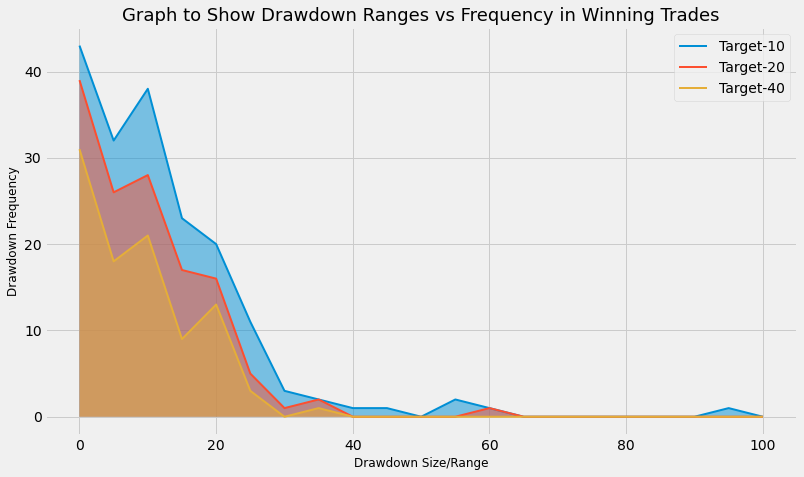

In [20]:
#Plot drawdown size in specified ranges against freequency of each range printed
plt.figure(figsize=(12,7))
plt.plot(drawdown_size, drawdown_quantity_ten,  linewidth=2);
plt.plot(drawdown_size, drawdown_quantity_twenty,  linewidth=2);
plt.plot(drawdown_size, drawdown_quantity_forty, linewidth=2);
plt.title("Graph to Show Drawdown Ranges vs Frequency in Winning Trades", fontsize=18)
plt.xlabel("Drawdown Size/Range", fontsize=12)
#plt.xlim([0,20])
plt.ylabel("Drawdown Frequency", fontsize=12)
plt.legend(["Target-10", "Target-20", "Target-40"])
plt.fill_between(drawdown_size, drawdown_quantity_ten, alpha=0.5)
plt.fill_between(drawdown_size, drawdown_quantity_twenty, alpha=0.5)
plt.fill_between(drawdown_size, drawdown_quantity_forty, alpha=0.5)
plt.show()

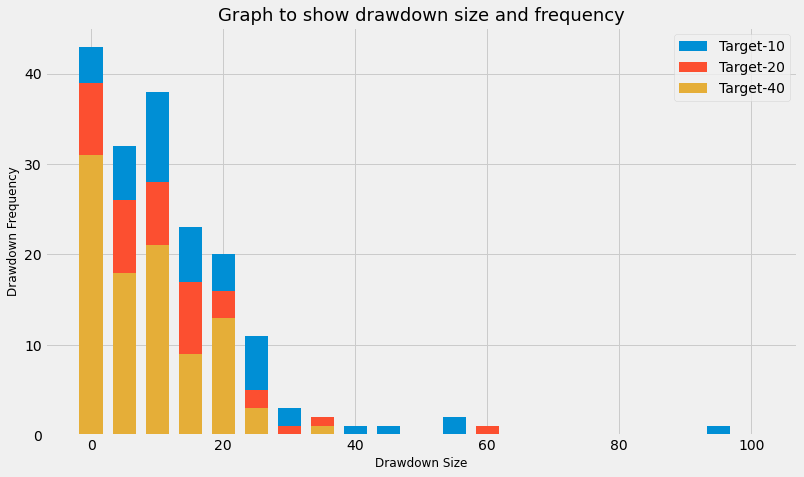

In [49]:
#Plot drawdown size in specified ranges against freequency of each range printed
plt.figure(figsize=(12,7))
plt.bar(drawdown_size, drawdown_quantity_ten, width=3.5);
plt.bar(drawdown_size, drawdown_quantity_twenty, width=3.5);
plt.bar(drawdown_size, drawdown_quantity_forty, width=3.5);
plt.title("Graph to show drawdown size and frequency", fontsize=18)
plt.xlabel("Drawdown Size", fontsize=12)
#plt.xlim([0,5])
plt.ylabel("Drawdown Frequency", fontsize=12)
plt.legend(["Target-10", "Target-20", "Target-40"])
plt.show()

In [44]:
#Lets see how many losses there are for similar bin values
loss_size = list(range(0, 100, 5))
loss_size

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

In [45]:
#Create bins for each range of sizes i.e 0-5, 5-10, 10-15 etc
loss_value_ten = []
for i in loss_size:
    loss_value_ten.append(df[(df.ten_profit<-i) & (df.ten_profit >= -i-5)].shape[0])


loss_value_twenty = []
for i in loss_size:
    loss_value_twenty.append(df[(df.twenty_profit<-i) & (df.twenty_profit >= -i-5)].shape[0])


loss_value_forty = []
for i in loss_size:
    loss_value_forty.append(df[(df.forty_profit<-i) & (df.forty_profit >= -i-5)].shape[0])
    
loss_value_ten, loss_value_twenty, loss_value_forty

([7, 19, 21, 20, 26, 16, 7, 9, 5, 1, 1, 5, 2, 1, 1, 1, 0, 0, 1, 0],
 [17, 30, 24, 29, 26, 18, 8, 9, 7, 1, 2, 6, 2, 1, 1, 1, 0, 0, 2, 0],
 [19, 35, 27, 34, 27, 21, 9, 9, 7, 2, 2, 6, 2, 1, 1, 1, 0, 0, 2, 0])

In [72]:
range(0, len(loss_size), 1)

range(0, 20)

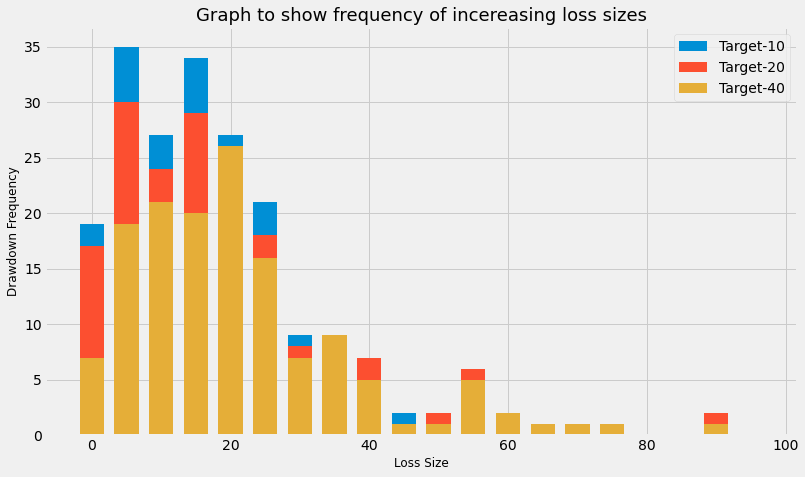

In [74]:
#Plot drawdown size in specified ranges against freequency of each range printed
plt.figure(figsize=(12,7))


plt.bar(loss_size, loss_value_forty, width=3.5);
plt.bar(loss_size, loss_value_twenty, width=3.5);
plt.bar(loss_size, loss_value_ten, width=3.5);



plt.title("Graph to show frequency of incereasing loss sizes", fontsize=18)
plt.xlabel("Loss Size", fontsize=12)
#plt.xlim([0,5])
plt.ylabel("Drawdown Frequency", fontsize=12)
plt.legend(["Target-10", "Target-20", "Target-40"])
plt.show()




##### Evaluation
+ We take care with the above graph as the loss sizes are determined by the size of the candle as the stops are set at the candle low or high dependent on the trade direction

Let's check if wins and losses appear in "clumps" as seems to be the case. We could use this trend to assist us with when to pile in or when to pull back more. 

In [163]:
#Let's test this on the target ten outcome
result = df[(df.ten_outcome=="win") | (df.ten_outcome=="loss")]

In [164]:
#Now we want to plot wins and losses on a time line so let's isolate the two required columns
result = result[["time", "ten_outcome"]]

result.head()

,time,ten_outcome
1,2020-04-23 15:00:00,win
4,2020-04-24 03:00:00,win
6,2020-04-24 11:00:00,win
7,2020-04-24 15:00:00,win
12,2020-04-27 11:00:00,loss


In [165]:
result1 = result[result.time.between("2020-04-23 15:00:00", "2020-05-23 15:00:00")]
result2 = result[result.time.between("2020-05-23 15:00:00", "2020-06-23 15:00:00")]
result3 = result[result.time.between("2020-06-23 15:00:00", "2020-07-23 15:00:00")]

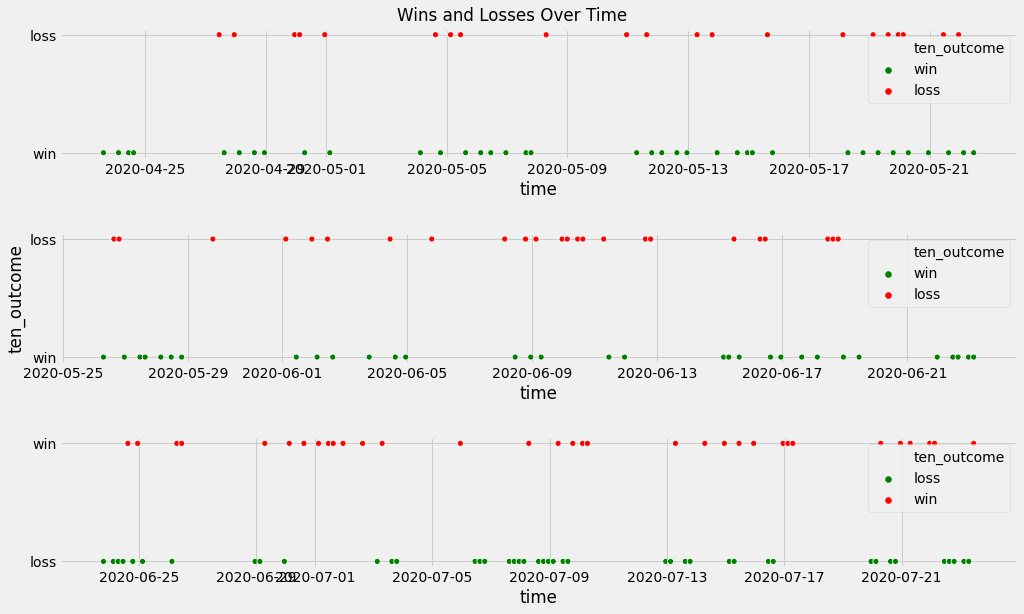

In [247]:
fig, axs = plt.subplots(nrows = 3, constrained_layout=True,  figsize=(15,9), sharey=True, sharex=True)

fig.suptitle("Win and Losses plotted against time")

plt.subplot(311)
sns.scatterplot(x = result1.time, y=result1.ten_outcome, hue=result1.ten_outcome, 
                palette=["green", "red"], data=result1)
plt.ylabel("")

plt.subplot(312)
sns.scatterplot(x = result2.time, y=result2.ten_outcome, hue=result2.ten_outcome,
                palette=["green", "red"], data=result2)
plt.subplot(313)
sns.scatterplot(x = result3.time, y=result3.ten_outcome, hue=result3.ten_outcome, 
                palette=["green", "red"], data=result3)
plt.ylabel("")

plt.suptitle("Wins and Losses Over Time")
plt.tight_layout(pad=2.5)



There are no obvious patterns or clumps of wins or losses illustrated in the above chart. The gaps most likely occur at weekends. 

In [27]:
df.head()

,time,open,high,low,close,direction,signal,ten_outcome,twenty_outcome,forty_outcome,ten_profit,twenty_profit,forty_profit,draw_ten,draw_twenty,draw_forty
0,2020-04-23 11:00:00,5770.0,5822.0,5755.6,5798.1,long,unknown,no_trade,no_trade,no_trade,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-04-23 15:00:00,5797.9,5847.9,5762.1,5773.2,short,trade,win,win,win,41.6,41.6,41.6,23.6,23.6,23.6
2,2020-04-23 19:00:00,5773.2,5796.8,5744.1,5769.5,short,no_trade,no_trade,no_trade,no_trade,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-04-23 23:00:00,5756.8,5770.2,5731.6,5740.2,short,no_trade,no_trade,no_trade,no_trade,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-04-24 03:00:00,5740.0,5755.0,5720.3,5744.3,long,trade,win,win,win,45.9,45.9,45.9,15.5,15.5,15.5


In [32]:
df[df.ten_outcome=="loss"].ten_profit.describe()

count    143.000000
mean     -23.930070
std       16.155442
min      -90.400000
25%      -29.300000
50%      -20.400000
75%      -12.800000
max       -0.400000
Name: ten_profit, dtype: float64